<a href="https://colab.research.google.com/github/e76971072/Lane-Detection/blob/master/Lane_Detection_Development_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ways filtering image**



1.   **grayscale image**
2.   **from grayscale image , then we can convert it to thresholded image**
3.   **Highlight the image using hul and hue**
4.   **Establish ROI**
5. **Finding contours from the thresholded image**
6. **Fill outer region with default color**
7. **Draw contour on the original image**




#**Edge cases**

> How can we detect the lane without the lines ? 

> Can we keep detect the brickpave over and over again ? and still receive same result?  


> Is there a way to extract the lighting the affect the lane? 



In [ ]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT)



Mounted at /content/drive


In [ ]:

folder="/content/drive/My Drive/Lane-Detection/supertuxkar2"


### **Import Library**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import os
import matplotlib.image as mpimg


# **Define Functions to process image**

In [ ]:


def region_of_interest (img, verticles):
  mask = np.zeros_like(img)
  channel_count = img.shape[2]
  match_mask_color = (255,) * channel_count
  cv2.fillPoly (mask, np.int32([verticles]), match_mask_color)
  masked_image = cv2.bitwise_not (img, mask)
  return masked_image 



def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=1)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img


def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_points ( image):
      height = image.shape[0]
      width = image.shape [1]
      region = [
          (0, height * 0.70  ), 
          (width/2, height/2.2),
          (width, height * 0.70  )                
      ]
      return region

def perspective_transform(img):
	"""
	Execute perspective transform
	"""
	img_size = (img.shape[1], img.shape[0])

	src = np.float32(
		[[200, 720],
		[1100, 720],
		[595, 450],
		[685, 450]])
 
	dst = np.float32(
		[[300, 720],
		[980, 720],
		[300, 0],
		[980, 0]])

	m = cv2.getPerspectiveTransform(src, dst)
	m_inv = cv2.getPerspectiveTransform(dst, src)

	warped = cv2.warpPerspective(img, m, img_size, flags=cv2.INTER_LINEAR)
	unwarped = cv2.warpPerspective(warped, m_inv, (warped.shape[1], warped.shape[0]), flags=cv2.INTER_LINEAR)  # DEBUG

	return warped, unwarped, m, m_inv




def birdeye(img, verbose=False):
    """
    Apply perspective transform to input frame to get the bird's eye view.
    :param img: input color frame
    :param verbose: if True, show the transformation result
    :return: warped image, and both forward and backward transformation matrices
    """
    h, w = img.shape[:2]

    #  Detectnig the corner of the image source corners 
    src = np.float32([[843, 518],    # br
                      [1067, 519],    # bl
                      [321, 900],   # tl
                      [1530, 900]])  # tr
    dst = np.float32([[843, 518],       # br
                      [1067, 519],       # bl
                      [843, 900],       # tl
                      [1067, 900]])      # tr
                      
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, (w, h))
    return warped
  
def ProperBricksEdgePoint(box, brickLongEdgePoint):
    """
    Filter PROPER size rectangles and get the endPoint of longer edge.
    """
    dist1 = tools.pointsdist(box[0], box[1])
    dist2 = tools.pointsdist(box[1], box[2])
    if(dist1>dist2 and dist2>10 and dist1<400):
       brickLongEdgePoint.append([box[0],box[1]])
    elif(dist1<dist2 and dist1>10 and dist2 <400):
       brickLongEdgePoint.append([box[1],box[2]])
    else:
       pass
    return brickLongEdgePoint

def calculate_angle(endPoint):
    v0=np.array(endPoint[0])-np.array(endPoint[1])
    v1=np.array([0,1])-np.array([0,0])
    angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
    return np.degrees(angle)





# Working With Curve Lane 

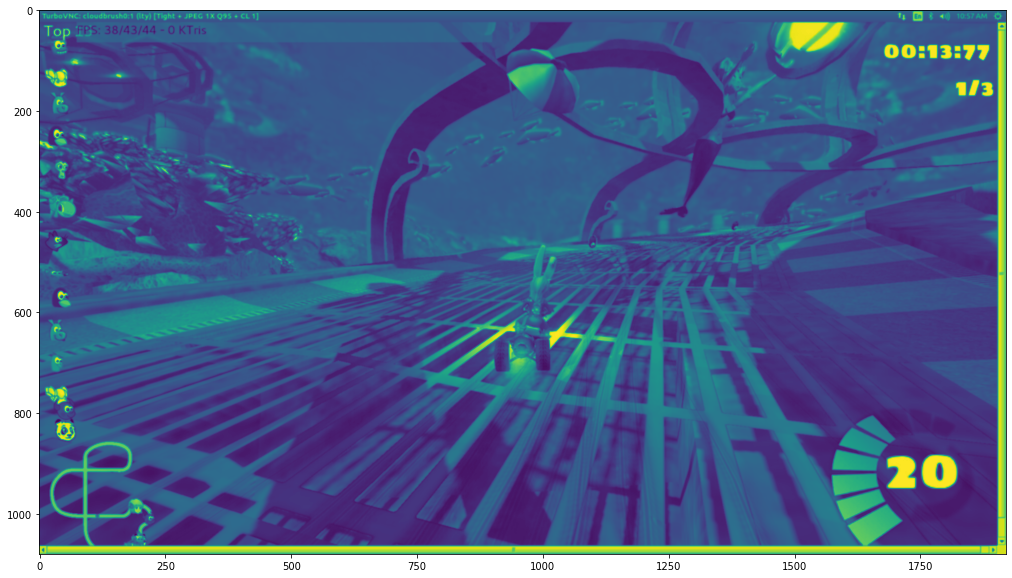

In [ ]:
# edge detection 



plt.rcParams["figure.figsize"] = (40,10)


# images = []
    # # for filename in os.listdir(folder):
curveLaneImg = cv2.imread( folder + "/Apr-26-2019-15-57-47.jpg")
    #     # if img is not None:
    # images.append(img)
plt.imshow(curveLaneImg)


grayscaleImage =  grayscale(curveLaneImg)

#Apply gaussian blur
gaussianImage = gaussian_blur(grayscaleImage, 5)
plt.imshow(gaussianImage)


In [ ]:
plt.close()


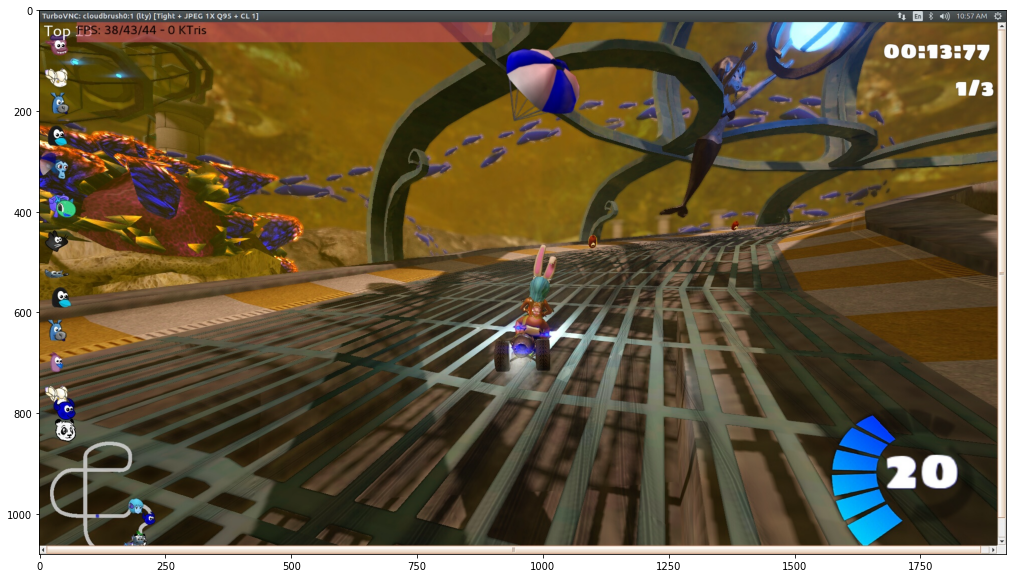

In [ ]:
plt.imshow(curveLaneImg)

# Working with Non-Curve Lane 

Working later with  focusing on straighline first

In [ ]:


# def region_of_interest(img, vertices):
#     mask = np.zeros_like(img)
#     #channel_count = img.shape[2]
#     match_mask_color = 255
#     cv2.fillPoly(mask, vertices, match_mask_color)
#     masked_image = cv2.bitwise_and(img, mask)
#     return masked_image


# image = cv2.imread(folder + "/Apr-26-2019-15-57-42.jpg")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# print(image.shape)
# height = image.shape[0]
# width = image.shape[1]



# gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


# blur = cv2.GaussianBlur(gray_image, (5,5), 0 ) 
# canny_image = cv2.Canny(blur, 0,  50)

# region_verticles = [
#      (0, 600 ), 
#      (width/2, height/2.2),
#      (width, 600)                
# ]

# cropped_image = region_of_interest(image,np.array([region_verticles], np.int32),)





# lines = cv2.HoughLinesP( image, 
#                         rho=6,
#                         theta=np.pi/180,
#                         threshold=0,
#                         lines=np.array([]),
#                         minLineLength=40,
#                         maxLineGap=25)

# image_with_lines = draw_the_lines(image, lines)

# plt.subplot(2, 3, 4)
# plt.imshow(cropped_image)
# plt.subplot(2, 3, 1)
# plt.imshow(gray_image)
# plt.subplot(2, 3, 2)
# plt.imshow(canny_image, cmap='gray', vmin=0, vmax=1)
# plt.subplot(2, 3, 3)
# plt.imshow(image_with_lines, cmap='gray', vmin=0, vmax=1)
# plt.show()
# plt.close()

Convert Normal to undistorted image

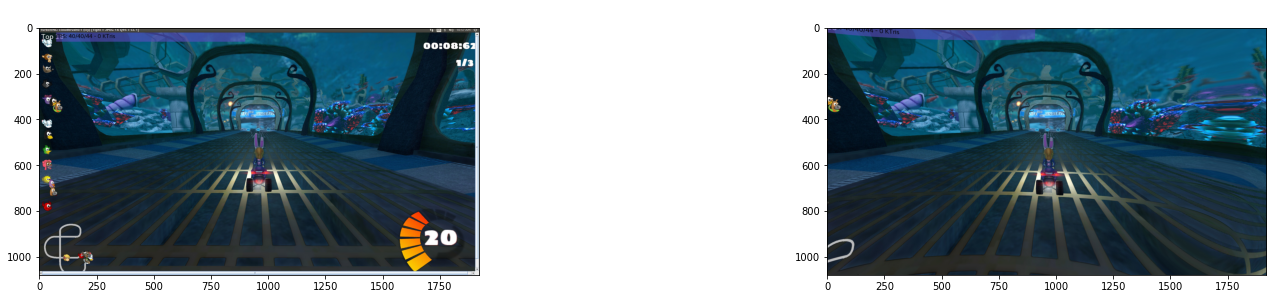

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


def calibrate_camera():
        # Mapping each calibration image to number of checkerboard corners
        # Everything is (9,6) for now
        objp_dict = {
          1: (9, 5),
          2: (9, 6),
          3: (9, 6),
          4: (9, 6),
          5: (9, 6),
          6: (9, 6),
          7: (9, 6),
          8: (9, 6),
          9: (9, 6),
          10: (9, 6),
          11: (9, 6),
          12: (9, 6),
          13: (9, 6),
          14: (9, 6),
          15: (9, 6),
          16: (9, 6),
          17: (9, 6),
          18: (9, 6),
          19: (9, 6),
          20: (9, 6),
        }

        # List of object points and corners for calibration
        objp_list = []
        corners_list = []

        # Go through all images and find corners
        for k in objp_dict:
          nx, ny = objp_dict[k]

          # Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
          objp = np.zeros((nx*ny,3), np.float32)
          objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

          # Make a list of calibration images
          fname = '/content/drive/My Drive/Lane-Detection/advanced_lane_detection/camera_cal/calibration%s.jpg' % str(k)
          img = cv2.imread(fname)

          # Convert to grayscale
          gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

          # Find the chessboard corners
          ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

          # If found, save & draw corners
          if ret == True:
            # Save object points and corresponding corners
            objp_list.append(objp)
            corners_list.append(corners)

            # Draw and display the corners
            #cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            #plt.imshow(img)
            #plt.show()
            #print('Found corners for %s' % fname)
          else:
            print('Warning: ret = %s for %s' % (ret, fname))

        # Calibrate camera and undistort a test image
        img = cv2.imread('/content/drive/My Drive/Lane-Detection/advanced_lane_detection/test_images/straight_lines1.jpg')
        img_size = (img.shape[1], img.shape[0])
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objp_list, corners_list, img_size,None,None)

        return mtx, dist


mtx, dist = calibrate_camera()
save_dict = {'mtx': mtx, 'dist': dist}
with open('/content/drive/My Drive/Lane-Detection/advanced_lane_detection/calibrate_camera.p', 'wb') as f:
        pickle.dump(save_dict, f)

      # Undistort example calibration image
img = mpimg.imread('/content/drive/My Drive/Lane-Detection/supertuxkar2/Apr-26-2019-15-57-42.jpg')
undistort_img = cv2.undistort(img, mtx, dist, None, mtx)





plt.rcParams["figure.figsize"] = (40,10)

plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title('Original', fontsize=20, color="white")

plt.subplot(2, 3, 2)
plt.imshow(undistort_img)
plt.title('Undistored', fontsize=20, color="white")
plt.pause(3)
plt.close()


In [ ]:
plt.close()



# 3.**Thresholded binary image**

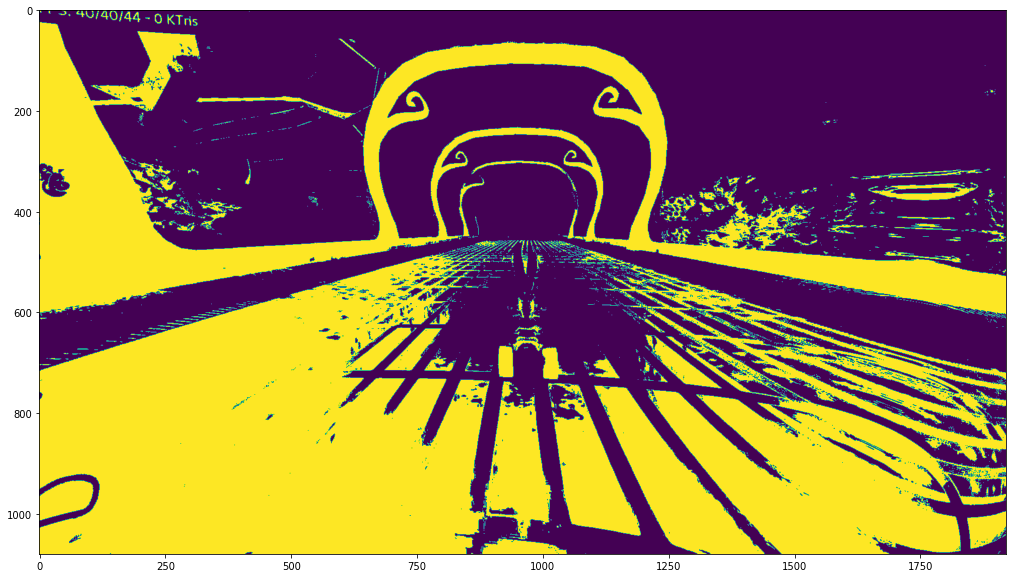

In [ ]:


'''
Apply threshold to the image after apllied birdeye view which flatten the image from 3D to 2D


'''
img_normal = undistort_img



# range high vue to lower vue, can be change accordingly 
huh=200
hul=50

#  Apply grayscale color 
gray = cv2.cvtColor(img_normal, cv2.COLOR_BGR2GRAY)


# Convert to binary image to exploit all the exposure color from the image
ret,thresholded_image = cv2.threshold(gray,hul,huh,1)



plt.rcParams["figure.figsize"] = (40,10)

plt.imshow(thresholded_image)

plt.show()
plt.pause(3)
plt.close()

# **4. Finding contours of the image**

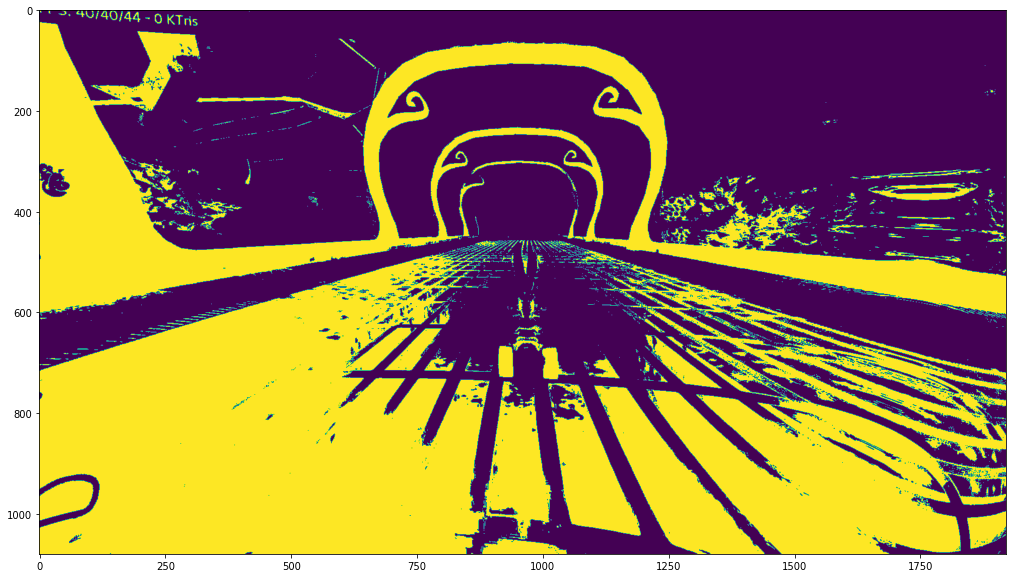

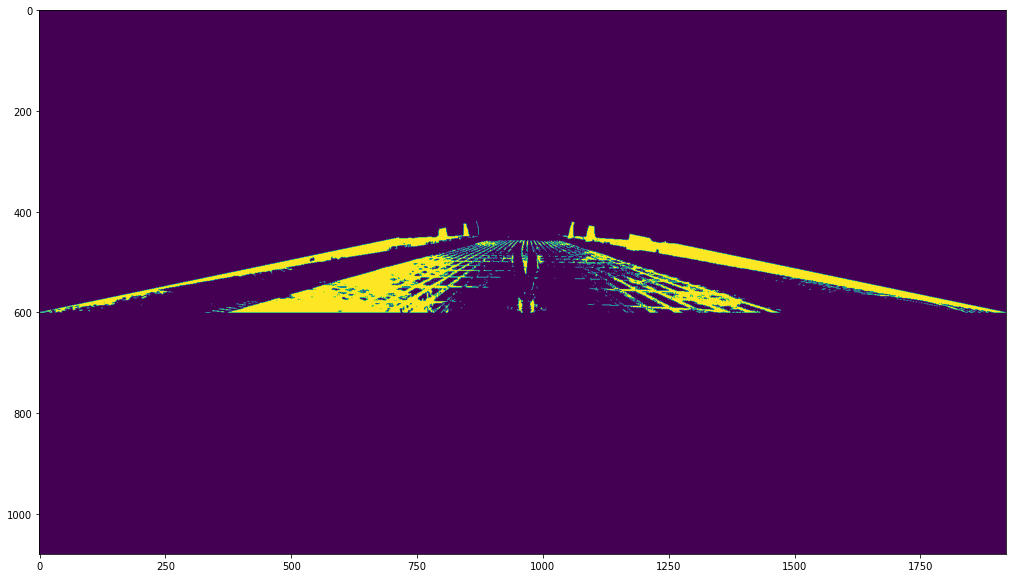

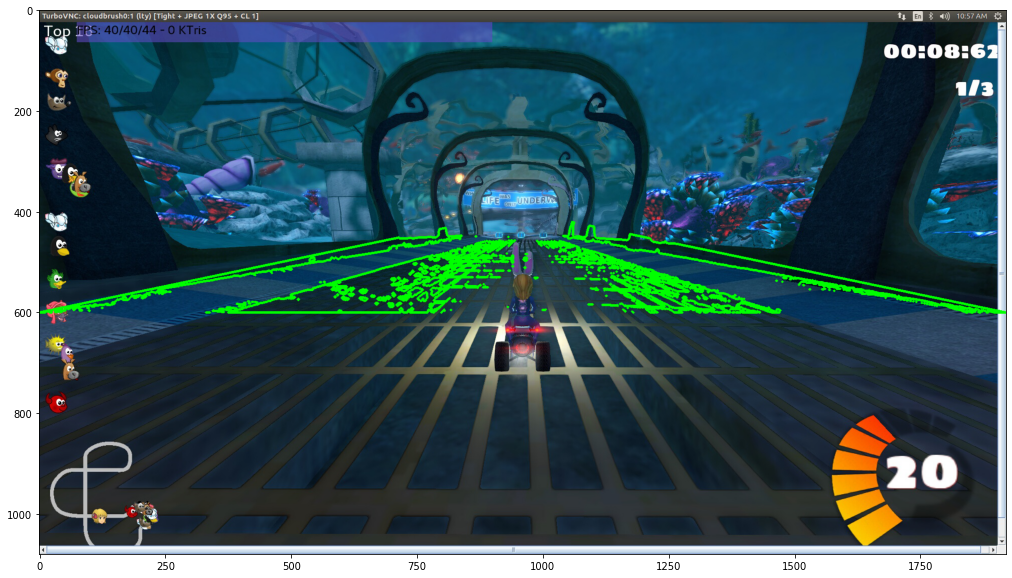

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt




#  Import distort image
image =  undistort_img
height, width, c = image.shape


def region_of_not_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_or (img, mask)
    return masked_image

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and (img, mask)
    return masked_image


def region_point_not_interest ():
      region_verticles_not = [
        ( 0, height), 
        (width/2, 400),
        (width, height)]
      return region_verticles_not


def region_point_interest () :
      region_verticles = [
        ( 0 ,  600 ), 
        (width/2, 400 ),
        (width, 600)]
      return region_verticles


# range high vue to lower vue, can be change accordingly 
huh=200
hul=50

#  Apply grayscale color 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Convert to binary image to exploit all the exposure color from the image


ret,thresholded_image = cv2.threshold(gray,hul,huh,1)


plt.imshow (thresholded_image)
plt.show()


cropped_image = region_of_interest(thresholded_image,np.array([ region_point_interest() ], np.int32),)

# finding the conturs for the cropped image 




contours,hierychy  = cv2.findContours( cropped_image,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

copy_img = img

#  remove small conturs 
threshold_area = 1000 
for contour in contours : 
  area = cv2.contourArea(contour)
  # print ( area)
  x,y,w,h = cv2.boundingRect(contour)
  if w > h : 
    # cv2.putText(img, str(w), (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    # cv2.rectangle(img, (x, y), (x + w, y + h), (36,255,12), 1)
  # if area  > threshold_area:
    filter_image = cv2.drawContours( copy_img, contour, -1, (0, 255, 0), 3)
  


plt.imshow (cropped_image)
plt.show()


plt.rcParams["figure.figsize"] = (40,10)
plt.imshow (copy_img)
plt.show()
plt.close()

# **5. Finding edge box contur with label**

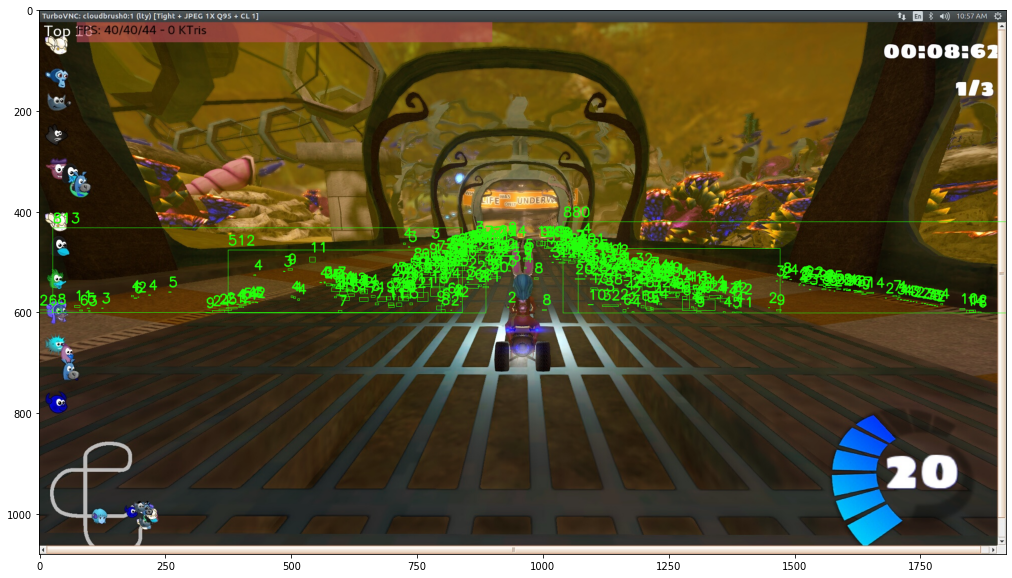

In [ ]:
image =  cv2.imread ( folder + "/Apr-26-2019-15-57-42.jpg")

new_image  =  image

for contour in contours : 
  area = cv2.contourArea(contour)
  # print ( area)
  x,y,w,h = cv2.boundingRect(contour)
  if w > h : 
    cv2.putText(new_image, str(w), (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.rectangle(new_image, (x, y), (x + w, y + h), (36,255,12), 1)


plt.imshow(new_image)
plt.show()
plt.pause(3)
plt.close()

# **6. Apply Polygon to outer region of interest**


```
  # draw a triangle
  # identify outer region 

  vertices = np.array([[width/2, 450], [ 700, 600], [1300, 600]], np.int32) # apply corners 
  pts = vertices.reshape((-1, 1, 2))
  cv2.polylines(cropped_image, [pts], isClosed=True, color=(0, 0, 255), thickness=20)

```



*Good Result but still not perfect*





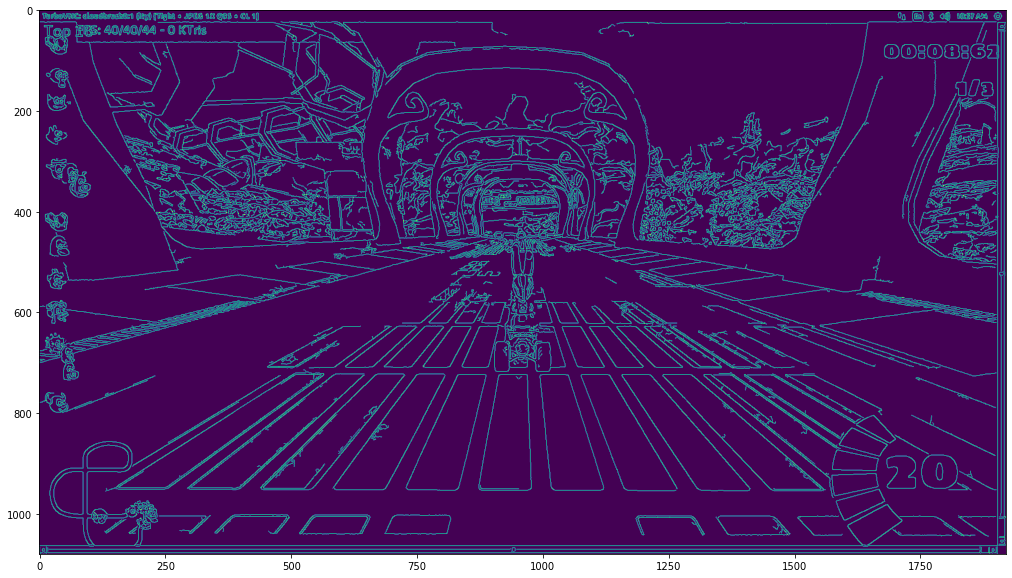

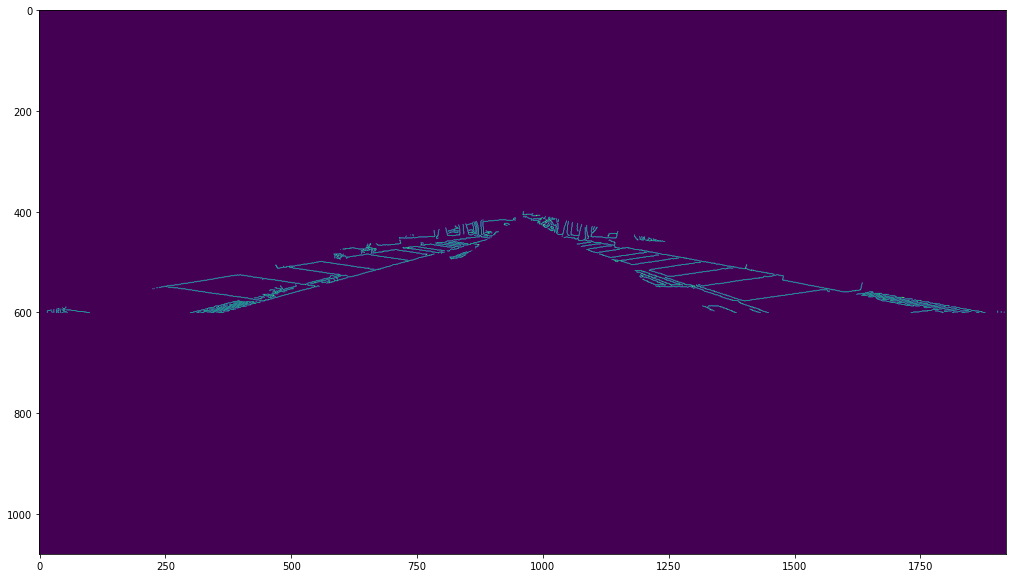

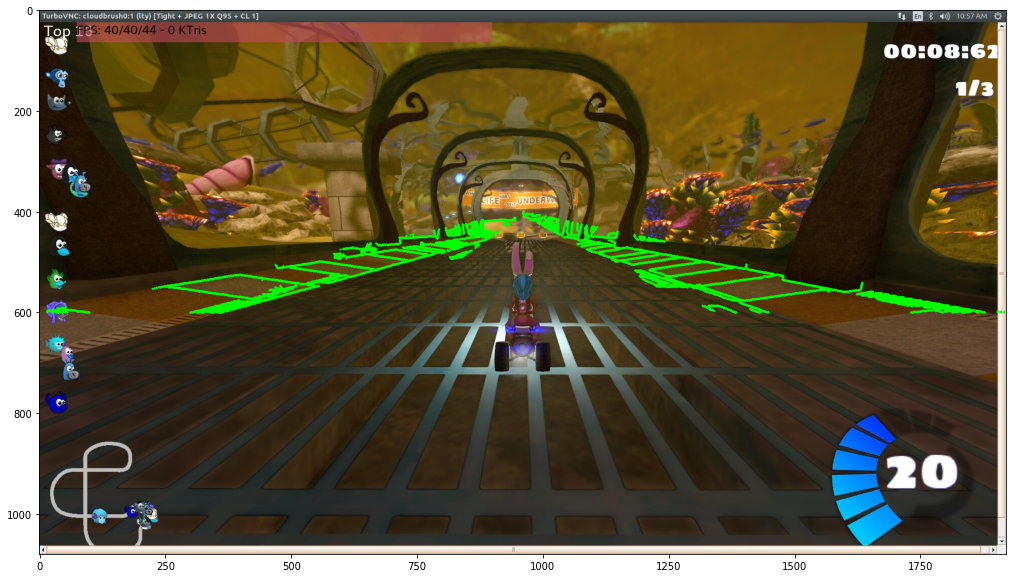

In [ ]:
test_img = cv2.imread ( folder + "/Apr-26-2019-15-57-42.jpg")



grayscaleImage = grayscale (test_img)


gaussianImage = gaussian_blur(grayscaleImage, 5)


canny_image = cv2.Canny (gaussianImage, 0,  50) # this has a better edge on the brickpaved than thresholded image

cropped_image = region_of_interest(canny_image,np.array([ region_point_interest() ], np.int32),)





# cv2.circle (cropped_image, (950,550),  200, (0, 0, 0) , -1) # ignore the bunny player and the road edges 


# cropped_image = region_of_not_interest (cropped_image, np.array ([ region_point_not_interest() ], np.int32),)

pt1 = ( width/2, 450)
pt2 = (300, 550)
pt3 = (1400, 550)


# cv2.drawContours( cropped_image, [triangle_cnt], 0, (0,255,0), -1)


# draw a triangle
vertices = np.array([[width/2, 420], [ 700, 600], [1300, 600]], np.int32)
pts = vertices.reshape((-1, 1, 2))
cv2.polylines(cropped_image, [pts], isClosed=True, color=(0, 0, 255), thickness=20)

# fill it with default color
cv2.fillPoly(cropped_image, [pts], color=(0, 0, 255))



plt.imshow (canny_image)
plt.show ()


# list of contours 
contours,hierychy  = cv2.findContours( cropped_image,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)



plt.imshow (cropped_image)
plt.show ()




copy_img = test_img


# aplly conturs detection on the original image
cv2.drawContours( copy_img, contours, -1, (0, 255, 0), 3)




plt.imshow (copy_img)
plt.show ()


# 7.**Filter Straighlines**

In [ ]:
cv2.destroyAllWindows()

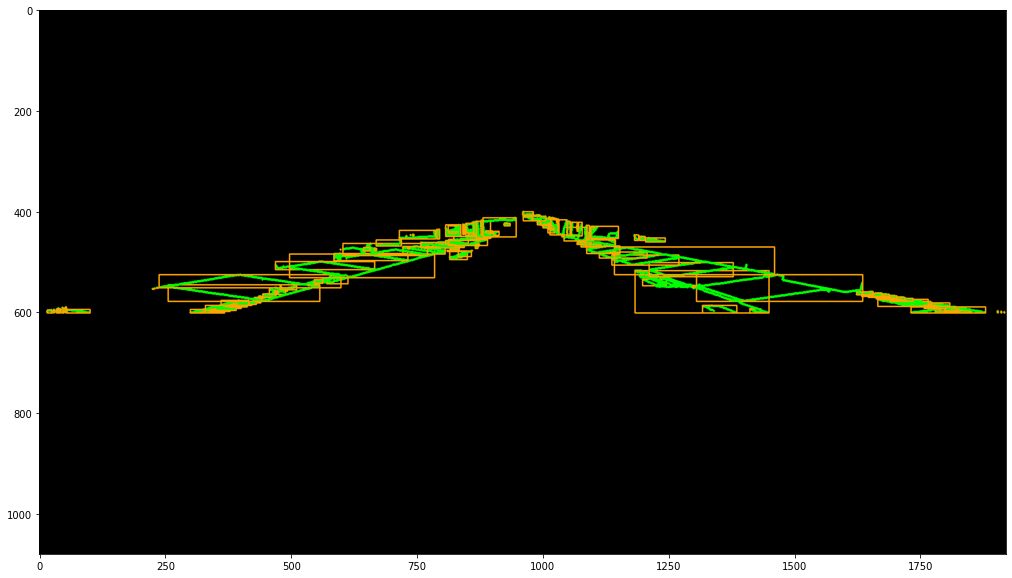

In [ ]:
import numpy as np

blank_image = np.zeros((height,width,3), np.uint8)

# define left and right side of the driver 

left_side  = width/2 


# print (contours[31][0][0][0])
# print (contours[31])
# print (np.shape(contours[31]))


for  contour in contours: 
  # if  np.shape(contour)[0] >= 150: 
    # x,y,w,h = cv2.boundingRect(contour)
    # arc = w / float(h)
    # area = cv2.contourArea(contour)
    # if len(contour) > 300:
    #   print ( "Bounding Points %d"% len(contour))
    cv2.drawContours(  blank_image, contour , -1, (0, 255, 0), 3)
    x,y,w,h = cv2.boundingRect(contour)
    # Draw the rectangle
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    # cv2.drawContours( blank_image,[box],0,(0,255,0),2)
    cv2.rectangle( blank_image,(x,y),(x+w,y+h),(255, 165, 0),2)
    # then apply fitline() function
    [vx,vy,x,y] = cv2.fitLine( contour,cv2.DIST_L2, 0, 0.01, 0.01)
    # Now find two extreme points on the line to draw line
    lefty = int((-x*vy/vx) + y)
    righty = int(((gray.shape[1]-x)*vy/vx)+y)
    #Finally draw the line
    cv2.line(blank_image, (gray.shape[1]-1,righty),(0,lefty),255,2)

plt.imshow (blank_image)
plt.show()


Meeting Task Nov 3 , 2020 

- Ask Tiyani to Detect the objects

- Learn computer region , ML 

- Pattern base features detection 



# 6.**PolyFill Fit line**